In [5]:
import pandas as pd
route = "../lectureMaterials/sample_data_titanic/"
train = pd.read_csv(route+"train.csv")

In [6]:
print(train.shape)

(891, 12)


In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test = pd.read_csv(route+"test.csv", index_col = "PassengerId")
print(test.shape)

(418, 10)


In [10]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
%matplotlib inline

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

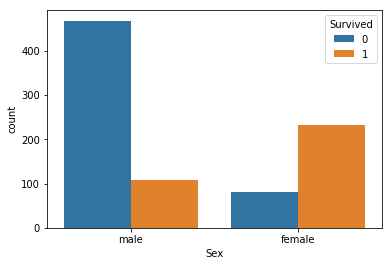

In [15]:
sns.countplot(data = train, x="Sex", hue = "Survived")

In [18]:
pd.pivot_table(train, index = "Sex", values = "Survived")

,Survived
Sex,
female,0.742038
male,0.188908


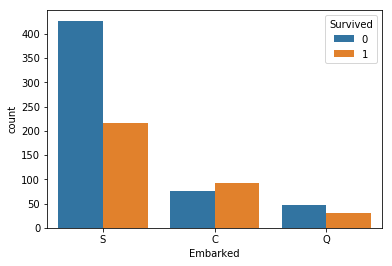

In [21]:
sns.countplot(data = train, x = "Embarked", hue = "Survived")

In [22]:
pd.pivot_table(train, index = "Embarked", values = "Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


# Ages & Fare

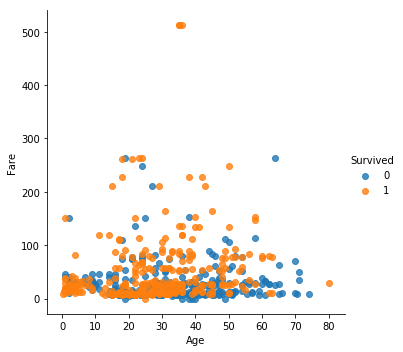

In [28]:
sns.lmplot(data = train, x = "Age", y = "Fare", hue = "Survived", fit_reg = False)

In [32]:
low_fare = train[train["Fare"] < 500]
print(low_fare.shape)
low_fare.head()

(888, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


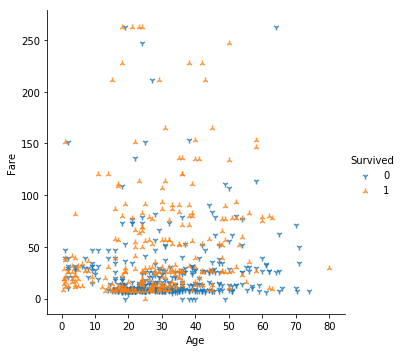

In [57]:
sns.lmplot(data = low_fare, x = "Age", y = "Fare", hue = "Survived", markers = ["1", "2"], fit_reg = False)

## Encode Sex

In [63]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
print(train.shape)

(891, 13)


In [65]:
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,0.0
1,female,1.0
2,female,1.0
3,female,1.0
4,male,0.0


In [66]:
train["Sex"].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [67]:
train[["Sex"]].head()

,Sex
0,male
1,female
2,female
3,female
4,male


# Fill in missing Fare

In [69]:
train[train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


In [70]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [77]:
train["Fare_fillin"] = train["Fare"]
test["Fare_fillin"] = test["Fare"]

In [87]:
train.loc[train["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0

In [101]:
test.loc[test["Fare_fillin"] == 0, ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0
1158,0.0,0.0
1264,0.0,0.0


In [102]:
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


# Practice - Encode Age

In [107]:
train[train["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,8.4583
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0.0,13.0000
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1.0,7.2250
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0.0,7.2250
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1.0,7.8792


In [110]:
train["Age_encode"] = train["Age"]
train.loc[train["Age"].isnull(), ["Age_encode"]] = 0
train.loc[train["Age"].isnull(), ["Age", "Age_encode"]].head()

,Age,Age_encode
5,NaN,0.0
17,NaN,0.0
19,NaN,0.0
26,NaN,0.0
28,NaN,0.0


## Practice - Find Age Average

In [112]:
print(train.loc[train["Age"].notnull()].shape)

(714, 15)


## Encode Embarked